In [1]:
%run utils.ipynb
%run data_encoder.ipynb

In [2]:
import math
import numpy as np
from sklearn.naive_bayes import GaussianNB

In [3]:
classical_guitar_dataset, encode_note, decode_note = encode_classical_guitar_data()

Extracting data from SpanishClassicalGuitar-FreePats...
Extracted 384 + 142 data points from SpanishClassicalGuitar-FreePats!


C:\Users\Totom3\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [4]:
gnb = GaussianNB()
gnb.fit(classical_guitar_dataset.X_train, classical_guitar_dataset.y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [5]:
y_pred_test = gnb.predict(classical_guitar_dataset.X_test)
test_discrepancies = (classical_guitar_dataset.y_test != y_pred_test)

y_pred_train = gnb.predict(classical_guitar_dataset.X_train)
train_discrepancies = (classical_guitar_dataset.y_train != y_pred_train)

print("Number of mislabeled test points out of a total {} points : {}"
       .format(len(classical_guitar_dataset.X_test), test_discrepancies.sum()))
print("Number of mislabeled train points out of a total {} points : {}"
       .format(len(classical_guitar_dataset.X_train), train_discrepancies.sum()))

print('\n Test Discrepancies:')
for idx, prediction in enumerate(y_pred_test):
    if not test_discrepancies[idx]:
        continue
    
    print(' [{}]: Predicted {} but expected {}'.format(idx, prediction, classical_guitar_dataset.y_test[idx]))

Number of mislabeled test points out of a total 142 points : 3
Number of mislabeled train points out of a total 384 points : 0

 Test Discrepancies:
 [21]: Predicted A3 but expected A4
 [33]: Predicted B2 but expected B3
 [98]: Predicted G3 but expected F#3


{100: 0.08068663787279423, 170: 0.1288170749810448, 180: 1.0, 190: 0.26419056840653304, 200: 0.18289800638359316, 210: 0.16806818365262255, 220: 0.11469308185255292, 370: 0.3493559499900645}


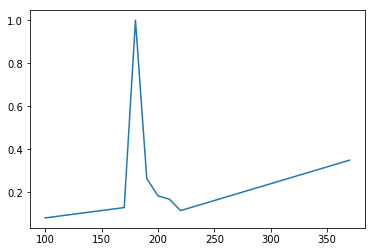

In [6]:
CheckBadDataPoint = True

if CheckBadDataPoint:
    import matplotlib.pyplot as plt

    bad_data_point = classical_guitar_dataset.test_data[98]
    
    frequencies = bad_data_point.frequencies()
    amplitudes = bad_data_point.data

    frequencies = [freq for idx, freq in enumerate(frequencies) if amplitudes[idx] > 0]
    amplitudes = [ampl for ampl in amplitudes if ampl > 0]
    
    print(dict(zip(frequencies, amplitudes)))

    plt.figure()
    plt.plot(frequencies, amplitudes)
    plt.show()

    generate_frequencies(dict(zip(frequencies, amplitudes)), 3, 'bad_data_point.wav')